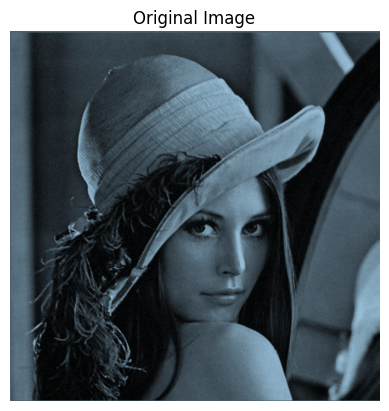

Image size: 734x733, Channels: 3
Total number of pixels: 538022


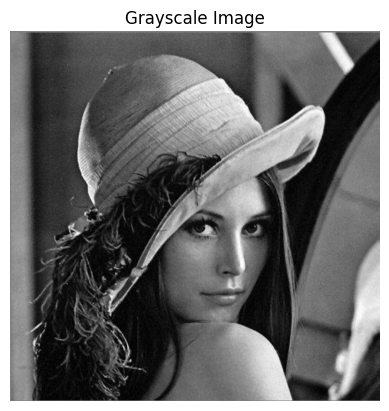

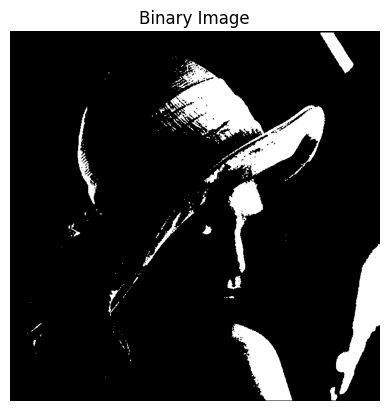

Black pixels in binary image: 482960
Binary image size: (734, 733)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('Lena_Image.png')

# 1. original image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

# 2. Display the image size
height, width, channels = image.shape
print(f"Image size: {height}x{width}, Channels: {channels}")

# 3. total number of pixels
total_pixels = height * width
print(f"Total number of pixels: {total_pixels}")

# 4. RGB to Grayscale image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

# 5.Binary image using Threshold
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# Display binary image
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.axis('off')
plt.show()

# black pixels
black_pixels = np.sum(binary_image == 0)
print(f"Black pixels in binary image: {black_pixels}")

# Size of the binary image
print(f"Binary image size: {binary_image.shape}")



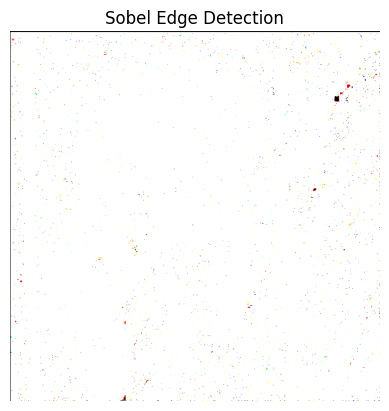

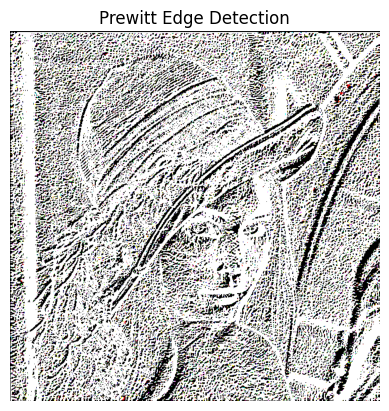

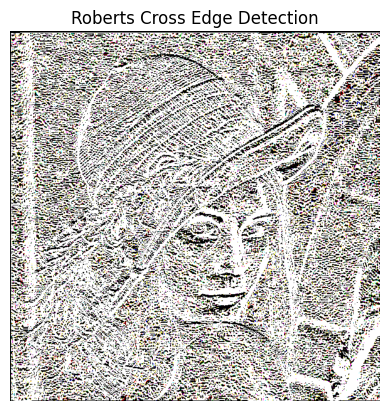

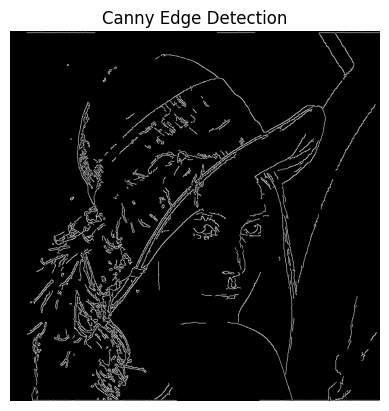

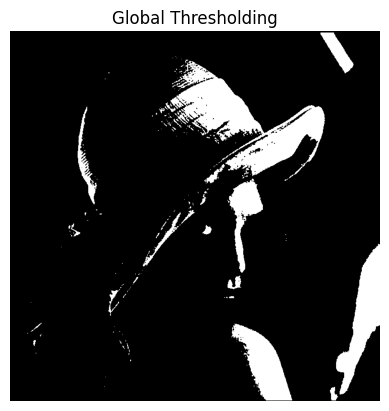

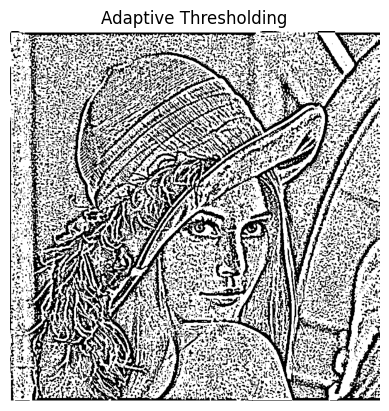

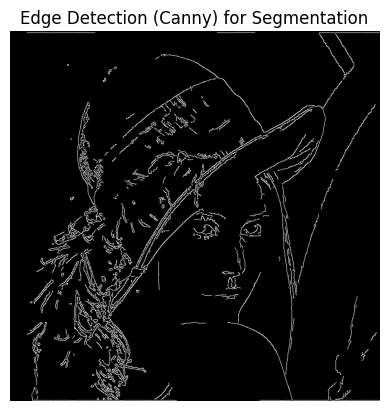

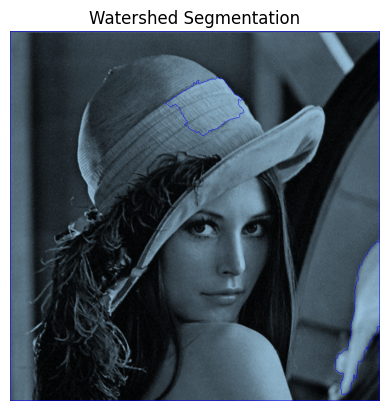

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import sobel, prewitt
from skimage.filters import roberts
from skimage.feature import canny

image_bgr = cv2.imread('Lena_Image.png')

if image_bgr is None:
    print("Error: Image not found.")
    exit()

#Task 2
# 1. Sobel Operator
sobel_x = cv2.Sobel(image_bgr, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image_bgr, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge = cv2.magnitude(sobel_x, sobel_y)
sobel_edge_normalized = cv2.normalize(sobel_edge, None, 0, 255, cv2.NORM_MINMAX)
plt.imshow(sobel_edge, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')
plt.show()

# 2. Prewitt Operator (Custom Kernel)
prewitt_kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

prewitt_x = cv2.filter2D(image_bgr, -1, prewitt_kernel_x).astype(np.float64)
prewitt_y = cv2.filter2D(image_bgr, -1, prewitt_kernel_y).astype(np.float64)

# magnitude (edge strength)
prewitt_edge = cv2.magnitude(prewitt_x, prewitt_y)

# result
plt.imshow(prewitt_edge, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis('off')
plt.show()


# 3. Roberts Cross Operator
roberts_kernel_x = np.array([[1, 0], [0, -1]])
roberts_kernel_y = np.array([[0, 1], [-1, 0]])

roberts_x = cv2.filter2D(image_bgr, -1, roberts_kernel_x).astype(np.float64)
roberts_y = cv2.filter2D(image_bgr, -1, roberts_kernel_y).astype(np.float64)
roberts_edge = cv2.magnitude(roberts_x, roberts_y)
roberts_edge_normalized = cv2.normalize(roberts_edge, None, 0, 255, cv2.NORM_MINMAX)

# result
plt.imshow(roberts_edge_normalized, cmap='gray')
plt.title("Roberts Cross Edge Detection")
plt.axis('off')
plt.show()


# 4. Canny Edge Detection
canny_edge = cv2.Canny(image_bgr, 100, 200)

plt.imshow(canny_edge, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()

# --- Task 2: Image Segmentation Techniques ---

# 1. Global Thresholding for Image Segmentation

gray_image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
_, global_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(global_thresh, cmap='gray')
plt.title("Global Thresholding")
plt.axis('off')
plt.show()

# 2. Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive Thresholding")
plt.axis('off')
plt.show()

# 3. Edge Detection for Segmentation using Canny

plt.imshow(canny_edge, cmap='gray')
plt.title("Edge Detection (Canny) for Segmentation")
plt.axis('off')
plt.show()

# 4. Region-Based Segmentation using Watershed Algorithm

gray_image_for_watershed = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
_, binary_watershed = cv2.threshold(gray_image_for_watershed, 127, 255, cv2.THRESH_BINARY)
binary_watershed = cv2.dilate(binary_watershed, None, iterations=3)
dist_transform = cv2.distanceTransform(binary_watershed, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_bg = cv2.dilate(binary_watershed, None, iterations=3)
36
sure_fg = np.uint8(sure_fg)
sure_bg = np.uint8(sure_bg)

unknown = cv2.subtract(sure_bg, sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)

# watershed algorithm
markers = markers + 1
markers[unknown == 255] = 0
cv2.watershed(image_bgr, markers)
image_bgr[markers == -1] = [255, 0, 0]

# watershed segmentation result
plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
plt.title("Watershed Segmentation")
plt.axis('off')
plt.show()
